<a href="https://colab.research.google.com/github/rudie999/PCVK/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS PRAKTIMUM**

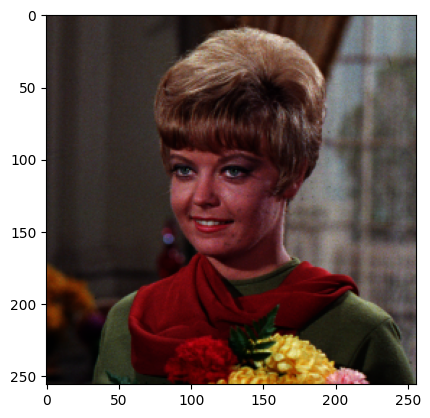

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/sample_data/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

1. Buat Gamma Correction sesuai dengan petunjuk berikut

> Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


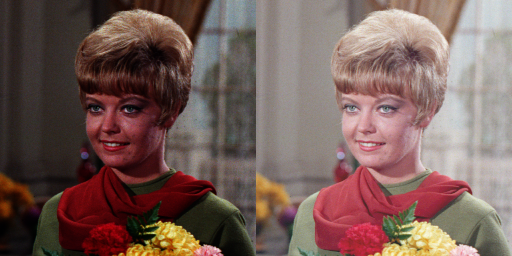

In [11]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth

> Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 2^7 = 128, dst.

> Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.

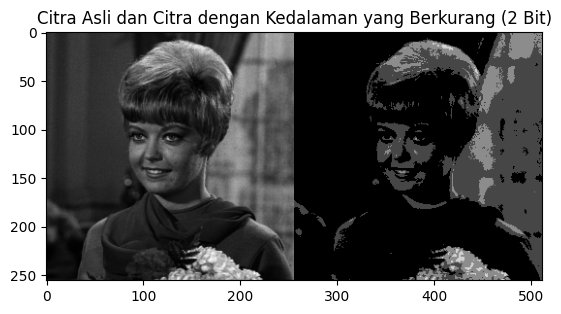

In [28]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

bit_depth = 2
levels = 2**bit_depth
original = cv.imread('/content/sample_data/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        pixel_value = original[y, x]
        quantized_value = int(pixel_value / (256 / levels)) * (256 / levels)
        depth_image[y, x] = quantized_value

# Tampilkan citra asli dan citra dengan kedalaman yang berkurang
final_frame = cv.hconcat((original, depth_image))
#plt.figure(figsize=(12, 6)) -- jika ingin kustomisasi ukuran
plt.title('Citra Asli dan Citra dengan Kedalaman yang Berkurang ({} Bit)'.format(bit_depth))
plt.imshow(final_frame, cmap='gray')
#plt.axis('off') -- Matikan sumbu x dan y
plt.show()


3. Buat modul Average Denoising

> Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob (import glob).

In [ ]:
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/noises/*.jpg'):
n= cv.imread(img)
cv_img.append(n)

> Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut
menggunakan cv_img[0], cv_img[1], dst.

> Catat hasil PSNR pada tabel berikut. Dari hasil yang sudah anda catat, tuliskan kesimpulan
anda:

1. Jumlah citra di average = 5, image hasil, dan nilai PSNR (db)

Nilai PSNR adalah 27.54309845181497 (dB)


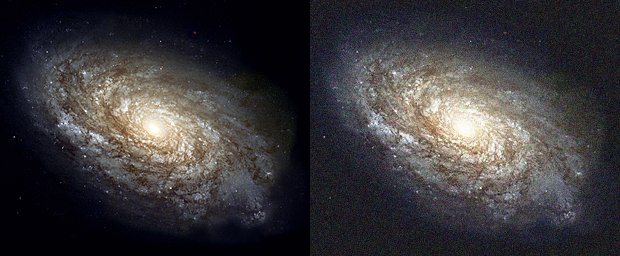

In [34]:
import glob
from math import log10, sqrt

original = cv.imread('/content/sample_data/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/sample_data/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

2. Jumlah citra di average = 10, image hasil, dan nilai PSNR (db)

Nilai PSNR adalah 27.554196719485834 (dB)


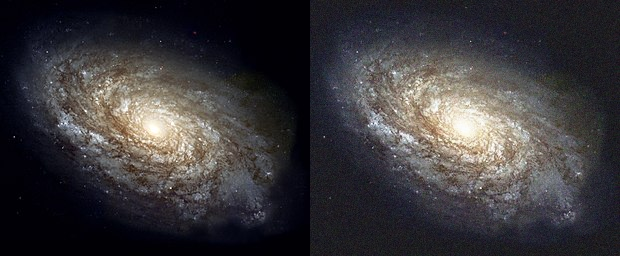

In [35]:
dst = cv_img[0]
noise_number = 9 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

3. Jumlah citra di average = 20, image hasil, dan nilai PSNR (db)

Nilai PSNR adalah 27.54399284945186 (dB)


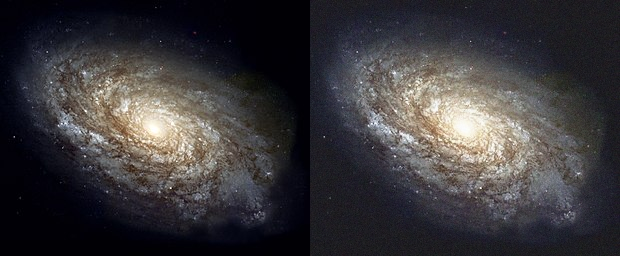

In [36]:
dst = cv_img[0]
noise_number = 19 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

4. Jumlah citra di average = 40, image hasil, dan nilai PSNR (db)

Nilai PSNR adalah 27.49765590706879 (dB)


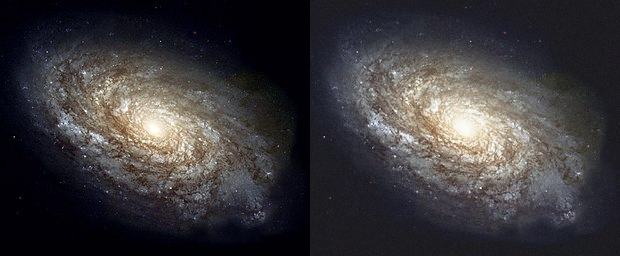

In [37]:
dst = cv_img[0]
noise_number = 39 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

5. Jumlah citra di average = 80, image hasil, dan nilai PSNR (db)

Nilai PSNR adalah 27.510710486652393 (dB)


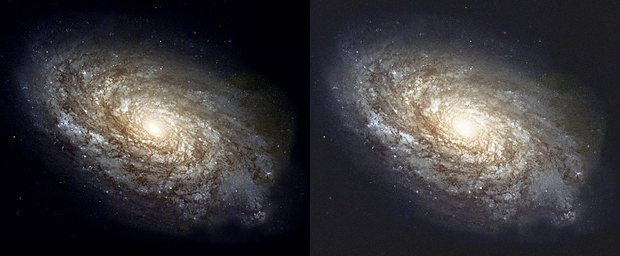

In [38]:
dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

> Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.

4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP), sedangkan image paling kanan adalah hasilnya:
> gambar 2

In [44]:
img_ktp = cv.imread('/content/sample_data/KTP1.jpg')

mask = np.zeros(img_ktp.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img_ktp & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img_ktp & mask1

ktp_frame = cv.hconcat((img_ktp, result))
cv2_imshow(ktp_frame)

SyntaxError: ignored

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

* NOT (Komplemen)

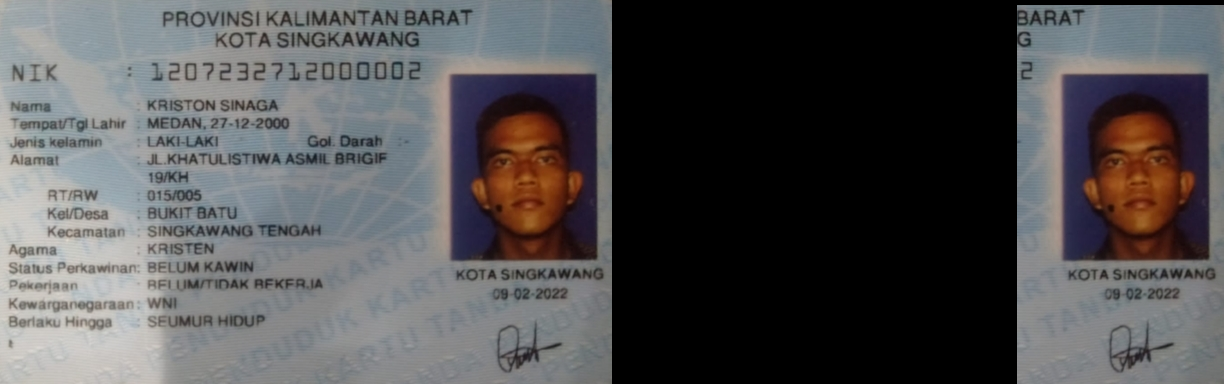

In [55]:
img_ktp = cv.imread('/content/sample_data/KTP1.jpg')

mask = np.zeros(img_ktp.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_ktp & ~mask

rose_frame = cv.hconcat((img_ktp, mask, masked))
cv2_imshow(ktp_frame)

* OR (Atau)

* AND (Dan)

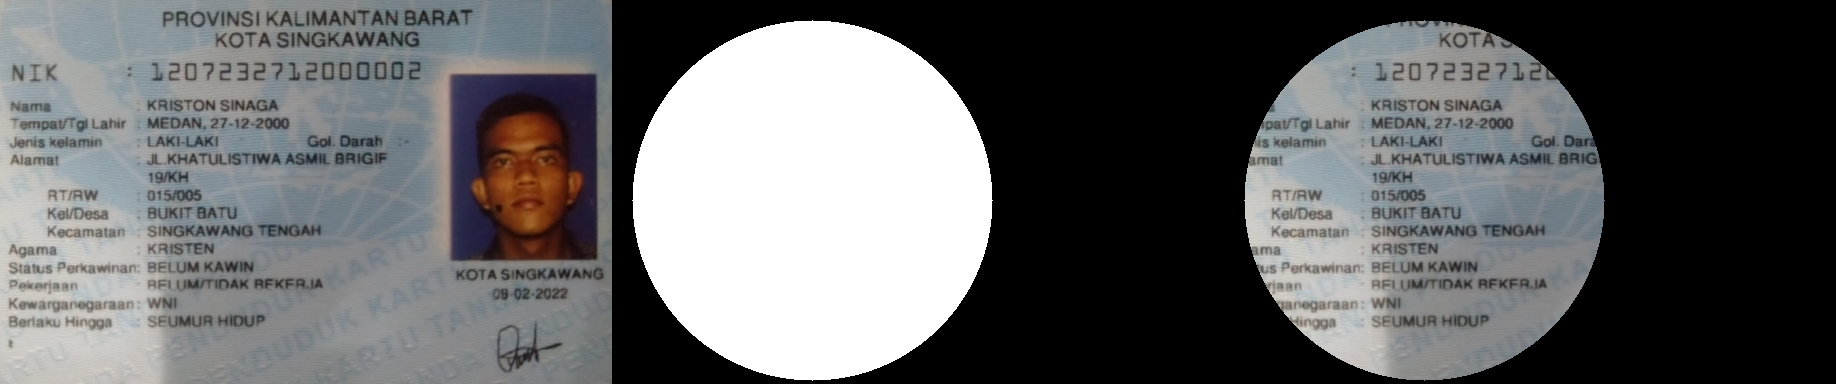

In [54]:
mask = np.zeros(img_ktp.shape, dtype=np.uint8)
mask = cv.circle(mask, (200, 200), 180, (255,255,255), -1)

masked = img_ktp & mask

rose_frame = cv.hconcat((img_ktp, mask, masked))
cv2_imshow(rose_frame)

* NAND (Not And)

* XOR (Exlusive Or)

**Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.**